In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

In [13]:
df = pd.read_csv('../data/temixco.csv',index_col=0,parse_dates=True)


In [14]:
df

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


In [15]:
meses = calendar.month_name[1:]

In [16]:
To = df.To.groupby(by=[df.index.month,df.index.hour]).mean().unstack().T

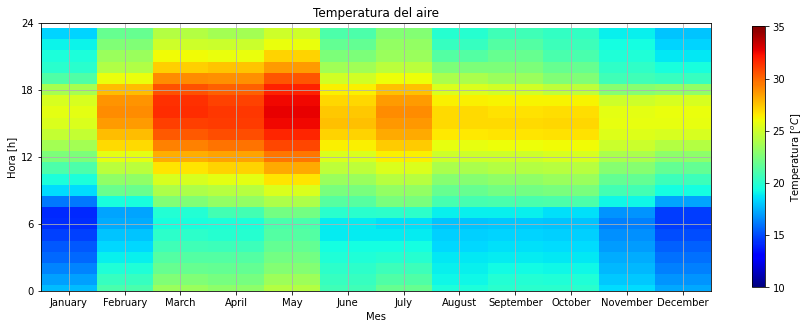

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
p = ax.imshow(To,cmap="jet",aspect=.2,vmin=10, vmax=35)

ax.set_xticks(np.arange(0,12,1))
ax.set_ylim(0,24)
ax.set_yticks(np.linspace(0,24,5))
ax.set_xticklabels(meses)
ax.set_ylabel("Hora [h]")
ax.set_xlabel("Mes")
ax.set_title("Temperatura del aire")
ax.grid()
fig.colorbar(p,shrink=0.48,ticks=np.arange(5,36,5),label="Temperatura [$^oC$]")